In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import math
from scipy.optimize import fsolve
from fractions import Fraction
from sklearn.metrics import mean_squared_error

In [4]:
c2 = 1/3
c3 = 2/3

In [8]:
def myFunction(z):    
    global c2
    global c3
    b1 = z[0]
    b2 = z[1]
    b3 = z[2]
    b4 = z[3]
    a32 = z[4]
    a42 = z[5]
    a43 = z[6]
    c4 = z[7]

    F = np.empty((8))
    F[0] = b1 + b2 + b3 + b4 - 1
    F[1] = b2*c2 + b3*c3 + b4*c4 - (1/2)
    F[2] = b2*(c2**2) + b3*(c3**2) + b4*(c4**2) - (1/3)
    F[3] = b3*a32*c2 + b4*a42*c2 + b4*a43*c3 - (1/6)
    F[4] = b2*(c2**3) + b3*(c3**3) + b4*(c4**3) - (1/4)
    F[5] = b3*c3*a32*c2 + b4*c4*a42*c2 + b4*c4*a43*c3 - (1/8)
    F[6] = b3*a32*(c2**2) + b4*a42*(c2**2) + b4*a43*(c3**2) - (1/12)
    F[7] = b4*a43*a32*c2 - (1/24)
    return F

zGuess = np.array([1/6, 1/3, 1/3, 1/6, 1/2, 0, 1, 1])
z = fsolve(myFunction,zGuess)

def getVariables(z=z, c2=c2 , c3=c3):
    c1 = 0
    data = [
            c1, c2, c3, z[7],
            c2, c3-z[4], z[4], z[7]-z[5]-z[6], z[5], z[6],
            z[0],z[1], z[2], z[3]]
    keys = [
            'c1', 'c2', 'c3', 'c4',
            'a21', 'a31', 'a32', 'a41', 'a42', 'a43',
            'b1', 'b2', 'b3', 'b4']
            
    variables = dict(zip(keys, data))
    return variables, keys

variables, keys = getVariables()

In [14]:
variables

{'a21': 0.3333333333333333,
 'a31': -0.333333333328209,
 'a32': 0.9999999999948757,
 'a41': 0.9999999999956566,
 'a42': -0.999999999989865,
 'a43': 0.9999999999924534,
 'b1': 0.12499999999974974,
 'b2': 0.3750000000010334,
 'b3': 0.374999999998435,
 'b4': 0.1250000000007819,
 'c1': 0,
 'c2': 0.3333333333333333,
 'c3': 0.6666666666666666,
 'c4': 0.9999999999982448}

In [11]:
def showButcher(var = variables):
    data = [
        [0, '', 0, 0, 0, ''],
        [var['c2'],'', var['a21'], 0, 0, ''],
        [var['c3'], '',var['a31'], var['a32'], 0, ''],
        [var['c4'],'', var['a41'], var['a42'], var['a43'], ''],
        ['', '', '', '', '', ''],
        [0,'',var['b1'],var['b2'], var['b3'], var['b4']] 
    ]
    butcher = pd.DataFrame(data)
    return butcher

In [12]:
showButcher()

,0,1,2,3,4,5
0,0,,0,0,0,
1,0.333333,,0.333333,0,0,
2,0.666667,,-0.333333,1,0,
3,1,,1,-1,1,
4,,,,,,
5,0,,0.125,0.375,0.375,0.125


In [26]:
def Exact( x ):
  return 0.615*(x**2) + 75*x + (75/1.23)

def F(x, y):
    return 1.23*x + 75

def RK4(xi, yi, h, var = variables):
    K1 = h * F ( xi , yi )
    K2 = h * F ( xi + var['c2'] * h , yi + var['a21'] * K1 )
    K3 = h * F ( xi + var['c3'] * h , yi + var['a31'] * K1 + var['a32'] * K2 )
    K4 = h * F ( xi + var['c4'] * h , yi + var['a41'] * K1 + var['a42'] * K2 + var['a43'] * K3 )
    
    y  = yi + var['b1'] * K1 + var['b2'] * K2 + var['b3'] * K3 + var['b4'] * K4
    return y

def CompareWithExact( h ):
    Exact_Values = []
    Modified_Values = []
    X_Values = []
    hs = np.arange(0,75)
    for i in hs:
        if i == 0:
            exact_value = Exact(0)
            Exact_Values.append(exact_value)
            Modified_Values.append(exact_value)
            X_Values.append(0)
        else:
            xi = X_Values[-1]
            yi = Modified_Values[-1]
            modified_value = RK4(xi, yi, h)
            Modified_Values.append(modified_value)
            xi = xi + h
            exact = Exact(xi)
            Exact_Values.append(exact)
            X_Values.append(xi)
   
    mse_M_E = mean_squared_error(Modified_Values, Exact_Values)
    rmse_M_E = math.sqrt(mse_M_E)

    plt.figure(figsize=(10, 6))
    plt.plot(X_Values, Exact_Values,'r*', label='Exact')
    plt.plot(X_Values, Modified_Values, label='Modified RK')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"When h={h} then RMSE={rmse_M_E}\n Taking c2={c2}\n&\nc3={c3}")
    plt.legend()
    
    return rmse_M_E

7.007230518079351e-10

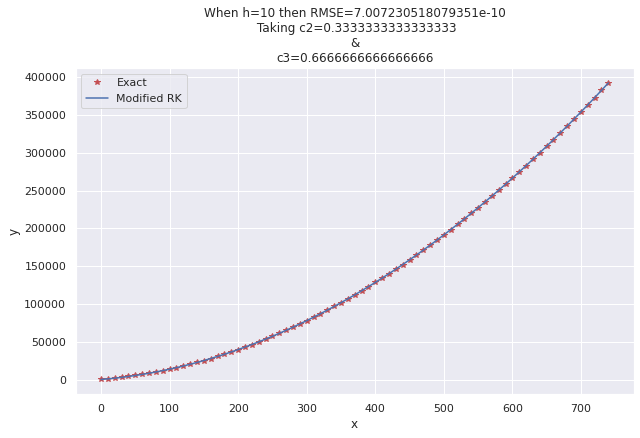

In [27]:
CompareWithExact(10)

In [17]:
def RMSE( h ):
    RK_Values = []
    Exact_Values = []
    X_Values = []
    hs = np.arange(0,75)
    for i in hs:
        if i == 0:
            exact = Exact(0)
            Exact_Values.append(exact)
            RK_Values.append(exact)
            X_Values.append(0)    
        else:
            xi = X_Values[-1]
            yi = RK_Values[-1]
            rk_value = RK4(xi, yi, h)
            RK_Values.append(rk_value)
            xi = xi + h
            exact = Exact(xi)
            Exact_Values.append(exact)
            X_Values.append(xi)
   
    mse = mean_squared_error(Exact_Values, RK_Values)
    rmse = math.sqrt(mse)

    return rmse

In [18]:
def ScalabilityTest( h ):
    intervals=[]
    labels = []
    errors = []
    for i in range(5):
        rmse = RMSE( h/(2**i) )
        errors.append(rmse)
        interval = f"h/{2**i}"
        labels.append(interval)
        intervals.append( h/(2**i) )
    plt.figure(figsize=(10, 6))
    plt.plot(intervals, errors, 'r-')
    plt.xlabel('h')
    plt.ylabel('RMSE')
    plt.xticks(intervals, labels)
    plt.title(f"h = {h}\nTaking c2={c2}\n&\nc3={c3}")

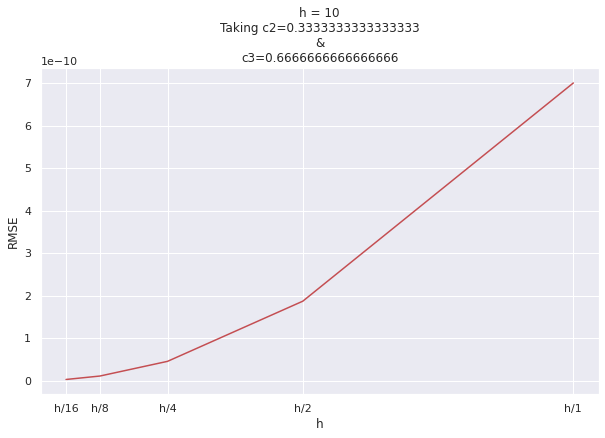

In [19]:
ScalabilityTest(10)